<a href="https://colab.research.google.com/github/amritxk/airbnb-data-analysis/blob/main/Amrit_keshri_%7BAirbnb_Bookings_Analysis%7D_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

A large portion of us were educated as children to never get into a strangers vehicle, yet today we have no issue at all dozing in a strangers home. Without Airbnb, this presumably would not have become a particularly normal event. 

For those new to Airbnb, it's a stage that assists individuals with leasing spare rooms or entire lofts to sightseers or others visiting a city. Even though a moderately new organization, financial backers assessed its income for 2016 at 1.6 billion, and anticipate 2.8 billion for 2017, moving to 8.5 billion by 2020.

Following are the things we are going to look in this project:
1. Understanding the Problem : We will understand each variable and do an analysis on them.
2. Cleaning the data : We will clean the data , handle the missing values and 
outliers.
3. Data Analysis : We will do an exploratory data analysis and plot different graphs to better understand the given data. 

***ACQUARING AND LOADING DATA***

In [1]:
# importing all the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from plotly import express as px
import urllib
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



In [2]:
# mounting the drive location
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading the airbnb data from drive
working_dir_path = '/content/drive/MyDrive/data/'
airbnb=pd.read_csv(working_dir_path + '/airbnb.csv')
'''using pandas library and 'read_csv' function to read airbnb csv file'''

"using pandas library and 'read_csv' function to read airbnb csv file"

In [4]:
# understanding different variables in our data
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
# checking type of every column in the dataset
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [8]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
airbnb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
airbnb[airbnb['name'].isnull()]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


After loading the data and going through the head , tail and description of the data we can see that there is rich amount of information for exploration also we can see some missing values which require cleaning and handling of NaN values. 

***WRANGLING AND CLEANING DATA***

*In our case, missing data that is observed does not need too much special treatment. Looking into the nature of our dataset we can state further things:  columns "last_review" and "review_per_month" need very simple handling. To elaborate, "last_review" is the date; if there were no reviews for the listing - the date simply will not exist. In our case, this column is irrelevant and insignificant therefore appending those values is not needed. For the "review_per_month" column we can simply append it with 0.0 for missing values; we can see that in "number_of_review" that column will have a 0, therefore following this logic with 0 total reviews there will be a 0.0 rate of reviews per month. Therefore, let's proceed with removing columns that are not important and handling missing data.*

*Fixing Bad Data*

In [12]:
airbnb.drop(columns=['last_review'],axis=1, inplace=True)

In [13]:
airbnb['reviews_per_month'].fillna(value=0 , inplace=True)

In [14]:
airbnb.isna().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

***POSTINGS ANALYSIS***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Number of postings and user distribution ')

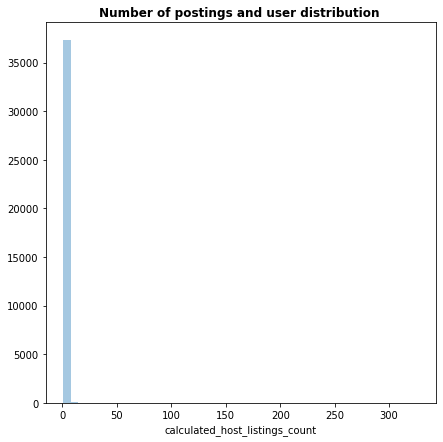

In [15]:
# Posting distribution plot 
plt.figure(figsize = (7,7))
plt_0=sns.distplot(airbnb.groupby('host_id')['calculated_host_listings_count'].mean(), kde=False, hist=True)
plt_0.set_title('Number of postings and user distribution ', fontdict = {'size': 12, 'weight':'bold'})


*From the Above Distribution plot we can observe that most users have around 1-2 listings on airbnb platfrom. Intrestingly there are users who have more than 300 listings they might be  professional agencies.*

In [16]:
# checking the top hosts with thier listing count
top_hosts_by_listings=airbnb.groupby('host_name')['calculated_host_listings_count'].max().sort_values(ascending=False).reset_index().rename(columns={'calculated_host_listings_count':'Count of Listings' , 'host_name':'Host Names'})[:10]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

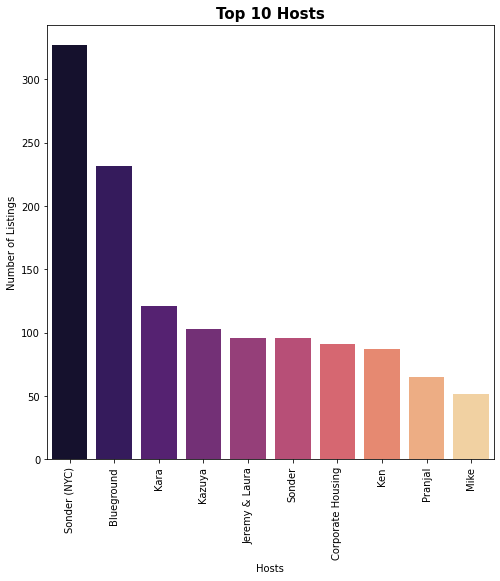

In [17]:
plt.figure(figsize = (8,8))
plt_1=sns.barplot(x="Host Names" , y="Count of Listings", data = top_hosts_by_listings , palette= 'magma')
plt_1.set_title('Top 10 Hosts', fontdict = {'size': 15, 'weight':'bold'})
plt_1.set_xlabel('Hosts', fontdict = {'size': 10})
plt_1.set_ylabel('Number of Listings',fontdict = {'size': 10})
plt.xticks(rotation = 90)


*Above bar plot shows the top 10 hosts having most amount of listings on airbnb platfrom.A quick Google search of the host names tells us that our hypotesis is correct for the higher ones: [Sonder](https://www.sonder.com/en-GB) and [Blueground](https://www.theblueground.com/apartments-in-new-york). The others (from the third onwards) in the ranking seem to be registered as "individual" users, although their listed as bussiness renting rooms.*

In [18]:
#Lets check the distribution of listings among all tha boroughs
neighbourhood_group_top_listings=airbnb.groupby('neighbourhood_group')['calculated_host_listings_count'].count().sort_values(ascending=False).reset_index().rename(columns={'calculated_host_listings_count':'Listings Count','neighbourhood_group':'Neighbourhood Group'})


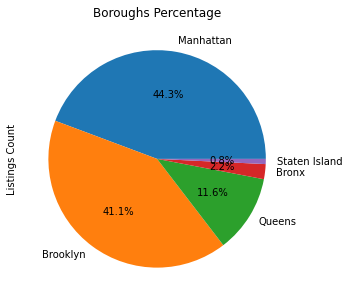

In [19]:
neighbourhood_group_top_listings.index = neighbourhood_group_top_listings['Neighbourhood Group']
neighbourhood_group_top_listings.plot.pie(y='Listings Count',autopct='%1.1f%%',legend=False ,figsize=(10,5), title= 'Boroughs Percentage')
figsize=(10,5)

*From the above pie plot we can see that about 85% of the lisitngs are in Manhattan and Brooklyn this can be because these cities have more tourist attractions than others and the tourist traffic is more in these two cities.*

In [20]:
#Lets check the distribution of listings among all neighbourhoods
top_neighbourhood_listings=airbnb.groupby('neighbourhood')['calculated_host_listings_count'].count().sort_values(ascending=False).reset_index().rename(columns={'neighbourhood':'Neighbourhood', 'calculated_host_listings_count':'Number of Listings'})[:10]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

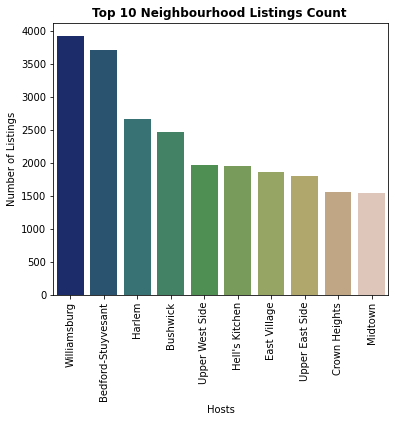

In [21]:
plt.figure(figsize = (6,5))
plt_3=sns.barplot(x="Neighbourhood" , y="Number of Listings", data = top_neighbourhood_listings , palette= 'gist_earth')
plt_3.set_title('Top 10 Neighbourhood Listings Count ', fontdict = {'size': 12, 'weight':'bold'})
plt_3.set_xlabel('Hosts', fontdict = {'size': 10})
plt_3.set_ylabel('Number of Listings',fontdict = {'size': 10})
plt.xticks(rotation = 90)


*From the above Bar plot we can see that most of the neighbourhood having large number of listings are from Manhattan and Brooklyn.*
*We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.*


In [22]:
airbnb.groupby('host_name')['neighbourhood_group'].value_counts().sort_values(ascending=False)[:10]

host_name     neighbourhood_group
Sonder (NYC)  Manhattan              327
Blueground    Manhattan              230
Michael       Manhattan              212
David         Manhattan              202
Michael       Brooklyn               159
John          Manhattan              151
David         Brooklyn               142
Kara          Manhattan              135
Mike          Manhattan              134
Alex          Manhattan              134
Name: neighbourhood_group, dtype: int64

In [23]:
# lets check the distrubtion of the top hosts on the map. 
top_hosts=airbnb[airbnb['calculated_host_listings_count'] > 30 ]

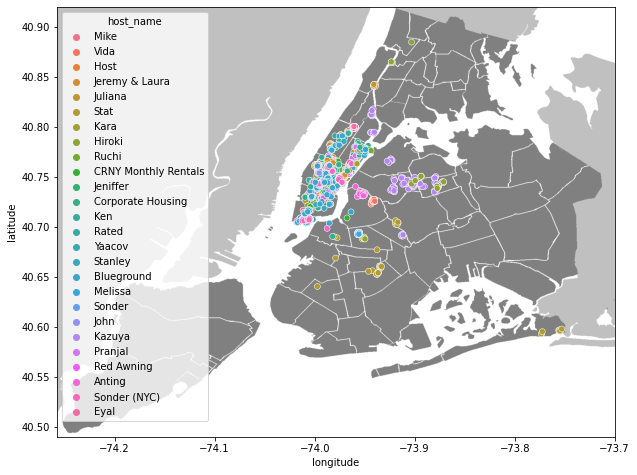

In [24]:
plt.figure(figsize = (10,10))
z=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(z)
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
sns.scatterplot(x = 'longitude', 
                y = 'latitude', 
                hue = 'host_name', 
                
                data = top_hosts,
               )



*The above map shows us the distribution of top hosts having more than 30 listings.
It can be easily concluded that top hosts have their listings majorly in the most traveled destinations, therefore would have the most listing availability.* 

In [25]:
# Lets check the Room type and their distribution
room_type_percentage = airbnb['room_type'].value_counts(normalize=True)
room_type_percentage=room_type_percentage.mul(100).rename('Percent').reset_index()
room_type_percentage.rename(columns={'index':'Room type'} , inplace= True)


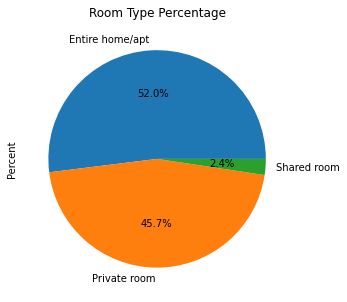

In [26]:

room_type_percentage.index = room_type_percentage['Room type']
room_type_percentage.plot.pie(y='Percent',autopct='%1.1f%%',legend=False ,figsize=(10,5), title= 'Room Type Percentage')


*Above pie plot shows Entire home / apt and Private rooms are contributing towards more than 95% of room type*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



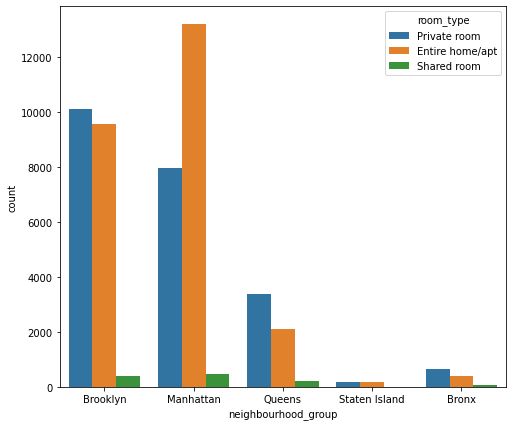

In [27]:
# Lets check the distribution of room types in various Boroughs
plt.figure(figsize=(8,7))
sns.countplot("neighbourhood_group" , hue ='room_type' , data = airbnb)

*The above count plot shows the distribution of different room types in various Boroughs.*

In [28]:
#Lets check the who are the most busiest hots
busiest_host=airbnb.groupby('host_name')['reviews_per_month'].agg('sum').sort_values(ascending=False).reset_index()[:20]


Text(0, 0.5, 'Hosts')

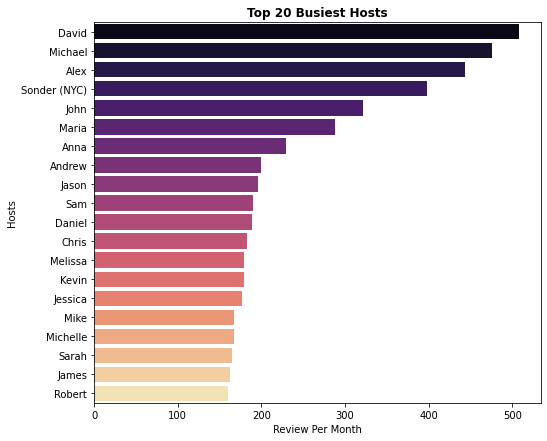

In [29]:
plt.figure(figsize=(8,7))
plt_9=sns.barplot(y="host_name" ,x='reviews_per_month', data =busiest_host  ,palette= 'magma')
plt_9.set_title('Top 20 Busiest Hosts', fontdict = {'size': 12, 'weight':'bold'})
plt_9.set_xlabel('Review Per Month', fontdict = {'size': 10})
plt_9.set_ylabel('Hosts',fontdict = {'size': 10})

***CONCLUSION***

1. *Most of the hosts in our data sheet have 1 or 2 Lisitings.*
2. *There are different types of hosts some are professional agencies with lagre number of listings and others are individual hosts with comperatively low numbers of listings*
3. *The professional hosts tend to prefer centric zones.*


***PRICING ANALYSIS***

In [30]:
# lets work on pricing analysis 
airbnb.groupby(['neighbourhood_group' ,'room_type'])['price'].describe()

count        mean  ...     75%      max
neighbourhood_group room_type                             ...                 
Bronx               Entire home/apt    379.0  127.506596  ...  140.00   1000.0
                    Private room       652.0   66.788344  ...   70.00   2500.0
                    Shared room         60.0   59.800000  ...   55.50    800.0
Brooklyn            Entire home/apt   9559.0  178.327545  ...  199.00  10000.0
                    Private room     10132.0   76.500099  ...   80.00   7500.0
                    Shared room        413.0   50.527845  ...   50.00    725.0
Manhattan           Entire home/apt  13199.0  249.239109  ...  259.00  10000.0
                    Private room      7982.0  116.776622  ...  120.00   9999.0
                    Shared room        480.0   88.977083  ...   89.25   1000.0
Queens              Entire home/apt   2096.0  147.050573  ...  168.25   2600.0
                    Private room      3372.0   71.762456  ...   75.00  10000.0
                    Shared room        198.0   69.020202  ...   54.25   1800.0
Staten Island       Entire home/apt    176.0  173.846591  ...  151.25   5000.0
                    Private room       188.0   62.292553  ...   75.00    300.0
                    Shared room          9.0   57.444444  ...   75.00    150.0

[15 rows x 8 columns]

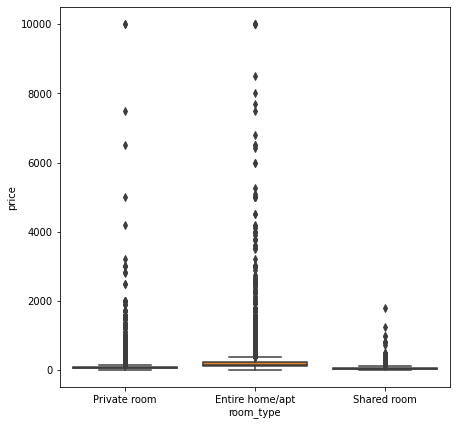

In [31]:
# box plot to check the outliers
plt.figure(figsize=(7,7))
sns.boxplot(x = 'room_type', y = 'price', data = airbnb)

*The graph above is depicting outliers for different Room Type.*
*Outliers can be defined as an observation that lies an abnormal distance from other values in a random sample from a population.*

*Fixing the outlier values*

In [32]:
mean_price=airbnb[airbnb['price'] < 500]['price'].mean()
airbnb.loc[airbnb['price'] > 500 , 'price'] = mean_price
airbnb_copy = airbnb[airbnb['price']>0]


*We have replaced all the price value which is more than 500 with the mean of price(< 500) value. Also ignoring the price = 0 because it does not make sense.*

In [33]:
airbnb_copy.groupby(['neighbourhood_group' ,'room_type'])['price'].describe()

count        mean  ...     75%    max
neighbourhood_group room_type                             ...               
Bronx               Entire home/apt    379.0  122.546601  ...  140.00  500.0
                    Private room       651.0   61.683812  ...   70.00  500.0
                    Shared room         60.0   48.634232  ...   55.50  165.0
Brooklyn            Entire home/apt   9558.0  159.268811  ...  190.00  500.0
                    Private room     10126.0   71.667390  ...   80.00  500.0
                    Shared room        411.0   49.326165  ...   50.00  400.0
Manhattan           Entire home/apt  13198.0  200.102242  ...  249.00  500.0
                    Private room      7982.0  103.859574  ...  120.00  500.0
                    Shared room        480.0   84.373254  ...   89.25  500.0
Queens              Entire home/apt   2096.0  138.676990  ...  161.25  500.0
                    Private room      3372.0   67.170353  ...   75.00  500.0
                    Shared room        198.0   50.536170  ...   54.25  500.0
Staten Island       Entire home/apt    176.0  125.013201  ...  150.00  450.0
                    Private room       188.0   62.292553  ...   75.00  300.0
                    Shared room          9.0   57.444444  ...   75.00  150.0

[15 rows x 8 columns]

In [34]:
neighbourhood_group_avgprice = airbnb_copy.groupby('neighbourhood_group')['price'].mean().reset_index().rename(columns={'neighbourhood_group':'Boroughs' , 'price':'Average Price'})


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

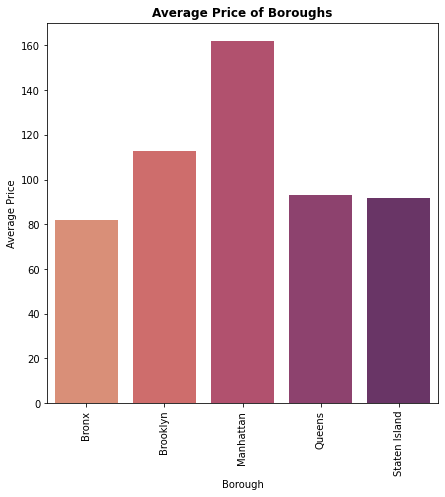

In [35]:
# Lets check the average price for different Boroughs
plt.figure(figsize = (7,7))
plt_4=sns.barplot(x="Boroughs" , y="Average Price", data =neighbourhood_group_avgprice, palette= 'flare')
plt_4.set_title('Average Price of Boroughs', fontdict = {'size': 12, 'weight':'bold'})
plt_4.set_xlabel('Borough', fontdict = {'size': 10})
plt_4.set_ylabel('Average Price',fontdict = {'size': 10})
plt.xticks(rotation = 90)


*We can observe from the above plot that the average price of lisiting is highest in Manhattan followed by Brooklyn.*

No handles with labels found to put in legend.


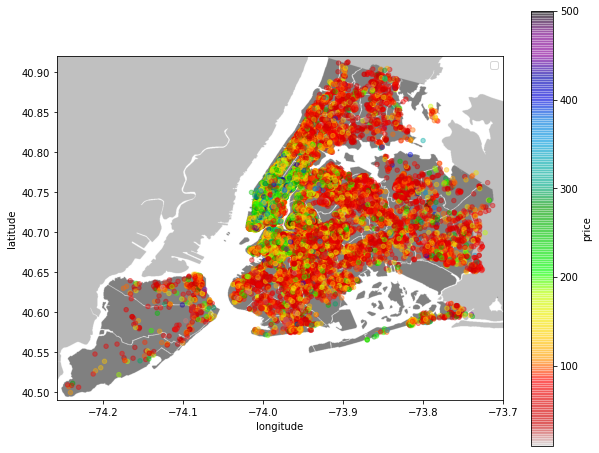

In [36]:
# Lets see what we can do with latitude and longitude
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
airbnb_copy.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax,
           cmap=plt.get_cmap('nipy_spectral_r'), colorbar=True, alpha=0.4, zorder=5 , figsize=(10,8))

plt.legend()
plt.show()

*The above is a very immersive heatmap. Using latitude and longitude points we are able to visualize all NYC listings with its price. However, it is important to note that we had to replace some extremely high values as they are treated as outliers for our analysis.*
*we can see that the most expensive rooms tend to be located in the Manhattan zone.*

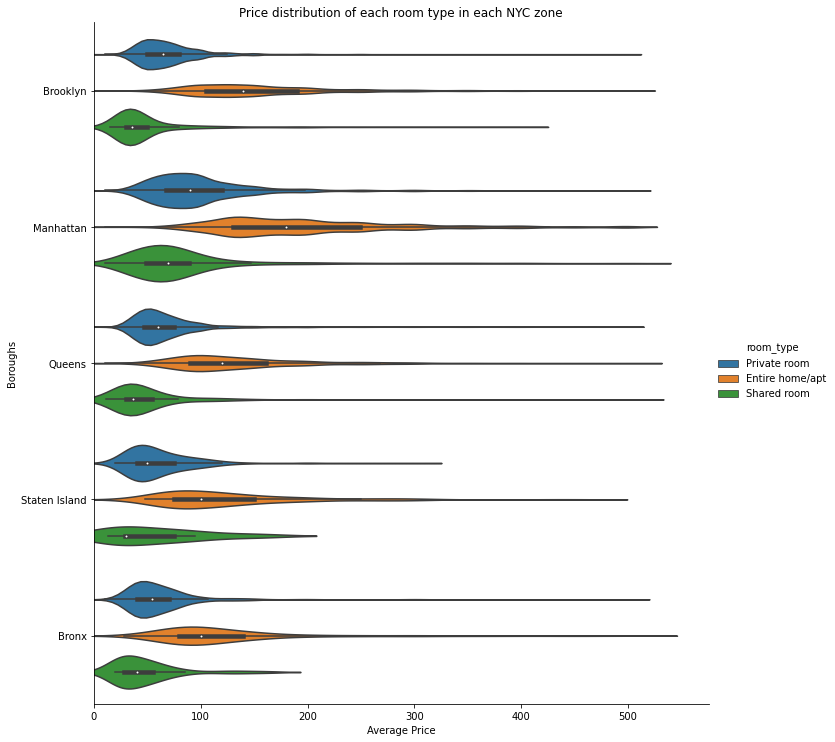

In [37]:
# Lets check the price distrubtion in different boroughs
v_plt=sns.catplot(x="price", y="neighbourhood_group", hue="room_type", data= airbnb_copy , kind='violin', height=10)
v_plt.axes[0][0].set_xlim(0,)
plt.title('Price distribution of each room type in each NYC zone')
plt.xlabel('Average Price', fontdict = {'size': 10})
plt.ylabel('Boroughs',fontdict = {'size': 10})
plt.show()

*With a violin plot we can definitely observe a couple of things about distribution of prices for Airbnb in NYC boroughs. First, we can state that Manhattan has the highest range of prices for the listings followed by Brooklyn. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. This distribution and density of prices were completely expected , for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.*

In [38]:
minimum_night_df=airbnb_copy[(airbnb_copy['minimum_nights'] <= 30) & (airbnb_copy['minimum_nights'] > 0)].groupby(['minimum_nights'])['price'].median().reset_index()

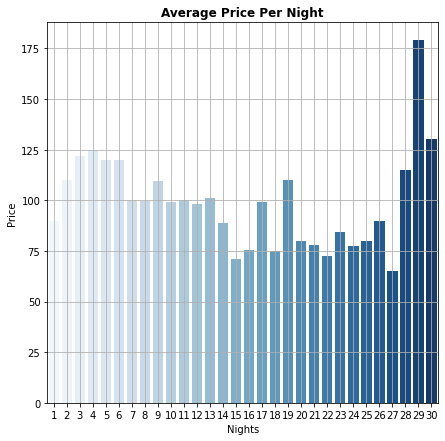

In [39]:
plt.figure(figsize = (7,7))
plt_6=sns.barplot(x="minimum_nights" , y="price", data =minimum_night_df, palette= 'Blues')
plt_6.set_title('Average Price Per Night', fontdict = {'size': 12, 'weight':'bold'})
plt_6.set_xlabel('Nights', fontdict = {'size': 10})
plt_6.set_ylabel('Price',fontdict = {'size': 10})
plt.grid(True)


Text(0, 0.5, 'Price')

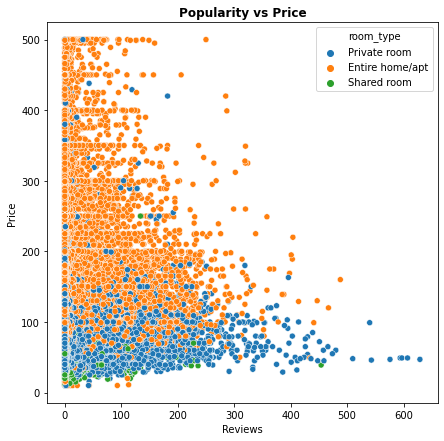

In [40]:
#Lets check how popular listings vary with price
plt.figure(figsize = (7,7))
plt_7=sns.scatterplot(x="number_of_reviews", y='price', hue='room_type', data=airbnb_copy)
plt_7.set_title('Popularity vs Price', fontdict = {'size': 12, 'weight':'bold'})
plt_7.set_xlabel('Reviews', fontdict = {'size': 10})
plt_7.set_ylabel('Price',fontdict = {'size': 10})


***Conclusion***


1. *Entire apartments are the most expensive ones from the other Room Types which is obvious*.
2. *The percentage of shared rooms are less compared to the other Room Types but most Shared rooms tend in the city centre*
3. *The price distributions of the room types point that, in general, shared and private rooms have similar prices (less deviation). On the other hand, entire apartaments have more variability (and are more expensive). We don't have data about the properties, but we can gess that other variables like square ft. or being near a metro station affect the price.*
4. *It's generally cheaper to stay in rooms between 14 and 28 nights.*
5. *When looking at the Popularity/Price plot, we can see that rooms with more reviews tend to be cheaper (although the Entire appartment class is more noisy than the others). This can be explained as: the more expensive is an apartment, the less people stays there and therefore, the less reviews. This would be interesting to use in a model to predict prices or the popularity of a room.*

***ROOM DESCRIPTION ANALYSIS***

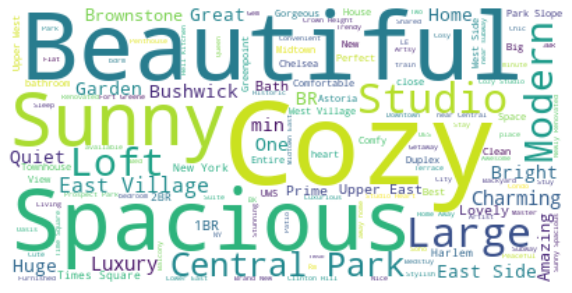

In [41]:
plt.figure(figsize = (10,10))
text = airbnb_copy['name'].str.replace('\|-|&|/|!'or'-','').str.cat(sep = ' ')
stopwords = set(STOPWORDS)
stopwords.update(['bed','in','room', 'apartment','Manhattan', 'Queen', 'Brooklyn', 'nyc', 'bedroom', 'private','apt', 'location','East Village', 'Williamsburg'
       ])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()